<a href="https://colab.research.google.com/github/Andreagazy/PCVK-2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Modul 7 - Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection
## NAMA : Andreagazy Iza Amerianto
## NIM : 224710146
## Kelas : TI-3A/03

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


### Konvolusi Tanpa Library

**Membuat Fungsi Konvolusi**
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra

In [34]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Mendapatkan dimensi citra dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menambahkan padding ke citra (mode='constant' berarti menambahkan nol di pinggir gambar)
    if padding > 0:
        padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    else:
        padded_image = image

    # Menghitung dimensi output
    output_height = ((image_height - kernel_height + 2 * padding) // stride) + 1
    output_width = ((image_width - kernel_width + 2 * padding) // stride) + 1

    # Mempersiapkan array output
    output = np.zeros((output_height, output_width)).astype(np.float32)

    # Melakukan konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Mengambil area dari citra yang sedang diliput kernel
            region = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            # Melakukan perkalian elemen-wise dan menjumlahkan hasilnya
            output[y, x] = np.sum(region * kernel)

    output = np.clip(output, 0, 255).astype(np.uint8)
    # Menghilangkan padding jika diperlukan
    return output



- Load citra yang akan diproses dan ubah menjadi citra keabuan

In [24]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

- Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [25]:
# image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

- Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

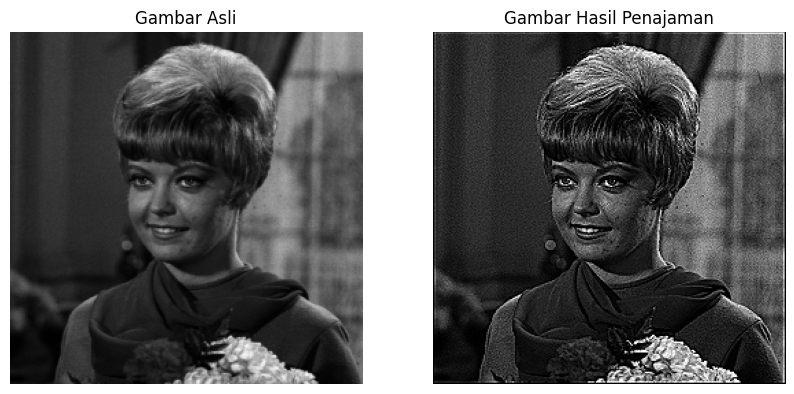

In [36]:
img_result = convolution2d(img_gray, kernel_sharpen,1,2)

# Menampilkan gambar asli dan gambar yang ditajamkan
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Gambar hasil penajaman
plt.subplot(1, 2, 2)
plt.imshow(img_result, cmap='gray')
plt.title('Gambar Hasil Penajaman')
plt.axis('off')

plt.show()


In [42]:
# Fungsi untuk menerapkan filter dan menampilkan hasilnya
def apply_filter_and_display(img_gray, kernel, title, stride=1, padding=0):
    img_result = convolution2d(img_gray, kernel, stride, padding)

    plt.figure(figsize=(10,5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar hasil filter
    plt.subplot(1, 2, 2)
    plt.imshow(img_result, cmap='gray')
    plt.title(f'Gambar Hasil {title}')
    plt.axis('off')

    plt.show()


### Averange Filter

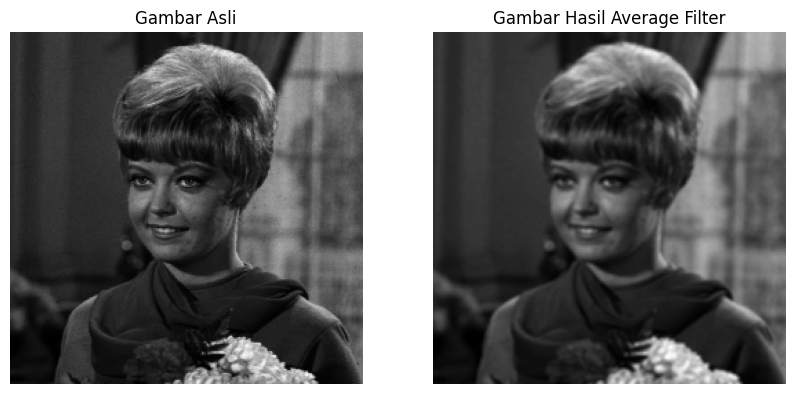

In [39]:
# Average Filter Kernel (3x3)
kernel_average = np.ones((3, 3), np.float32) / 9.0

# Menerapkan Average Filter
apply_filter_and_display(img_gray, kernel_average, 'Average Filter', 1, 0)

### Low Pass Filter

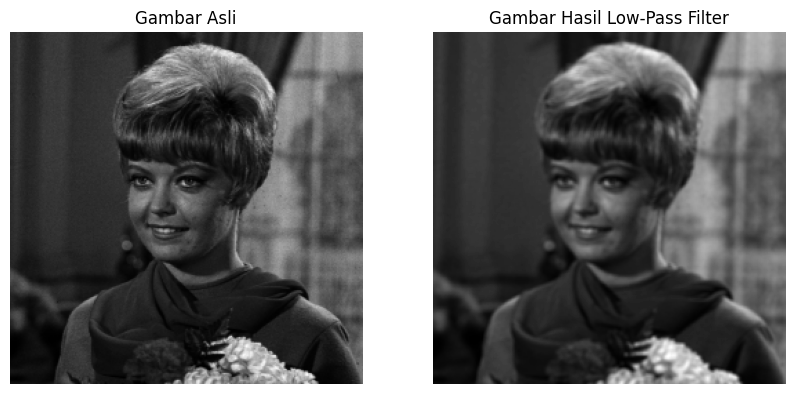

In [41]:
# Low-Pass Filter Kernel
kernel_low_pass = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]], np.float32) / 9.0

# Menerapkan Low-Pass Filter
apply_filter_and_display(img_gray, kernel_low_pass, 'Low-Pass Filter', 1, 0)

### Hihg Pass Filter

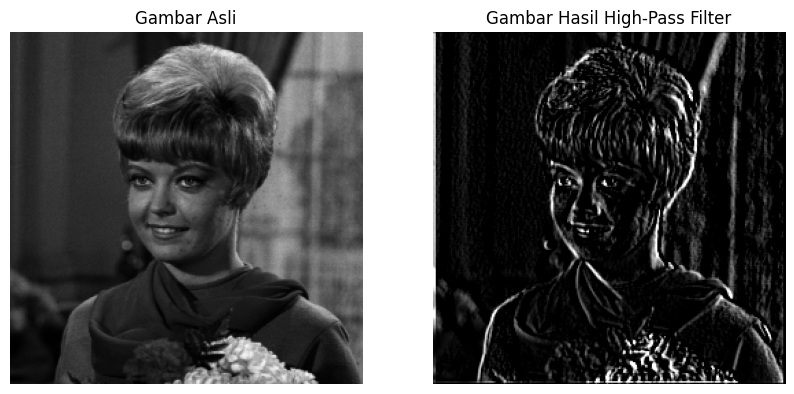

In [48]:
# High-Pass Filter Kernel
kernel_high_pass = np.array([[-1, 0, 1],
                      [-1, 0, 3],
                      [-3, 0, 1]])

# Menerapkan High-Pass Filter
apply_filter_and_display(img_gray, kernel_high_pass, 'High-Pass Filter', 1, 2)

### Sharpen

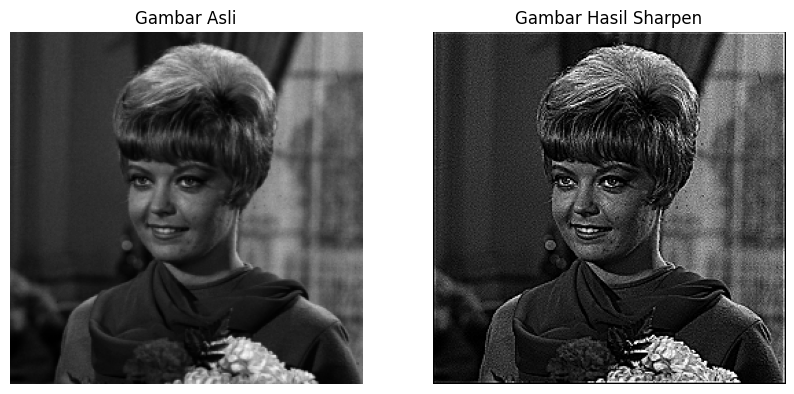

In [49]:
kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
apply_filter_and_display(img_gray, kernel_sharpen, 'Sharpen', 1, 2)

### Emboss

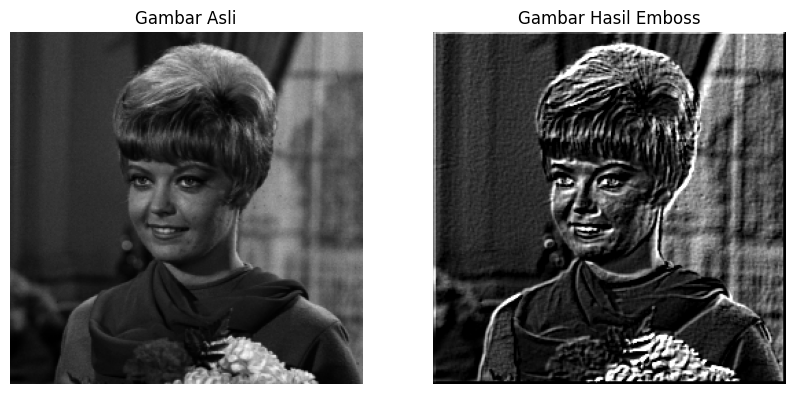

In [52]:
kernel_emboss = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])
apply_filter_and_display(img_gray, kernel_emboss, 'Emboss', 1,2)

### Left Sobel Edge Detection

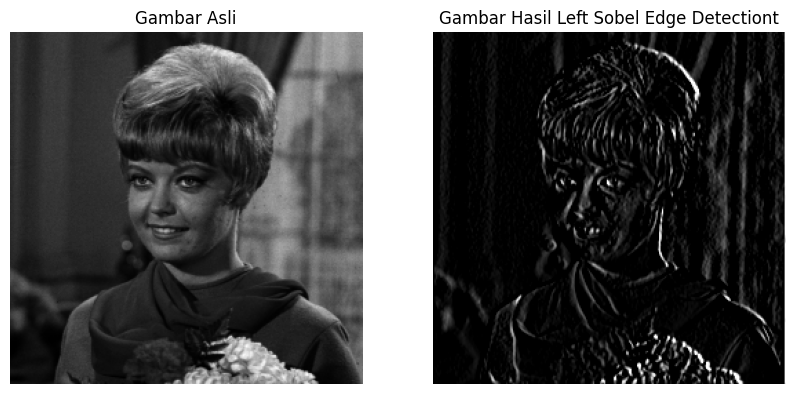

In [57]:
kernel_left_sobel = np.array([[ 1,  0, -1],
                              [ 2,  0, -2],
                              [ 1,  0, -1]])
apply_filter_and_display(img_gray, kernel_left_sobel, 'Left Sobel Edge Detectiont', 1, 1)

### Canny Edge Detection

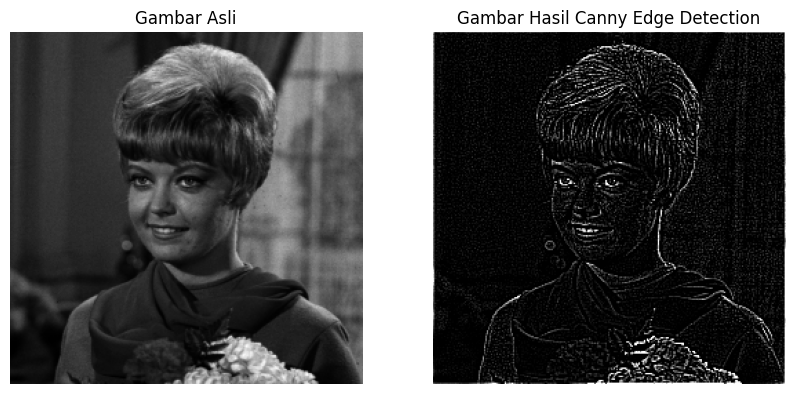

In [58]:
kernel_canny = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
apply_filter_and_display(img_gray, kernel_canny, 'Canny Edge Detection', 1, 1)

### Prewitt Edge Detection

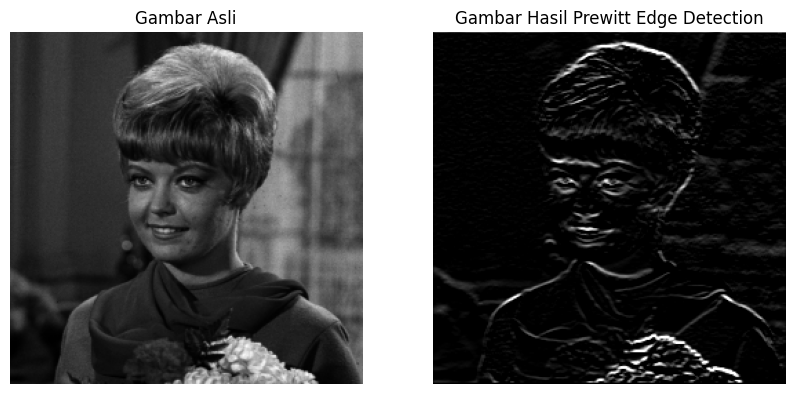

In [59]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]])
apply_filter_and_display(img_gray, kernel_prewitt, 'Prewitt Edge Detection', 1, 1)

### 5x5 Gausian Blur

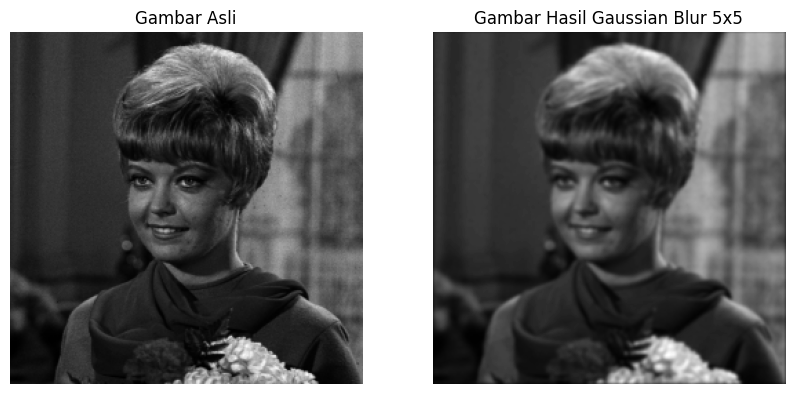

In [60]:
kernel_gaussian_5x5 = np.array([[1,  4,  6,  4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1,  4,  6,  4, 1]]) / 256

apply_filter_and_display(img_gray, kernel_gaussian_5x5, 'Gaussian Blur 5x5', 1, 2)

### 21 x 21 Gausian Blur

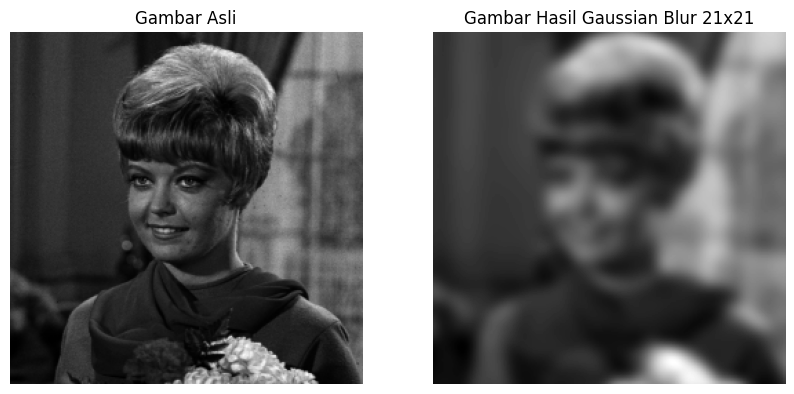

In [61]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
apply_filter_and_display(img_gray, gauss_kernel, 'Gaussian Blur 21x21', 1,1)